# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

592

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#opening csv file
with open(output_data_file, 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',')
    #header
    csvwriter.writerow(['City', 'Cloudiness', 'Country', 'Date', 'Humidity','Lat','Lng','Max Temp','Wind Speed'])
    
    #count and setcount iterators
    count = 0
    setcount = 1
    
    #loop through cities from citipy
    print('Beginning Data Retrieval\n-----------------------------')
    for city in cities:
        count += 1
        
        #pull data from api for this city
        url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&APPID={api_key}"
        response = requests.get(url).json()

        #ignore cities not found
        if response['cod'] == '404':
            message = 'City not found. Skipping...'   #message to print
            
        #if found, create csv elements
        else:
            temp = response['main']['temp_max']
            maxtemp = (temp - 273.15) * 9/5 + 32 #converting kelvin to fahrenheit
            message = f'Processing Record {count} of Set {setcount} | {city}'  #message to print
            
            #write row of elements from response json elements
            csvwriter.writerow([response['name'], response['clouds']['all'], response['sys']['country'], response['dt'], response['main']['humidity'], response['coord']['lat'], response['coord']['lon'], maxtemp, response['wind']['speed']])

        print(message)
        
        #start new set every 50 cities
        if count%50 == 0:
            setcount += 1
            count = 0

    print("-----------------------------\nData Retrieval Complete\n-----------------------------")
        
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | kapaa
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | tautira
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | alindao
Processing Record 8 of Set 1 | tiksi
City not found. Skipping...
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | russell
City not found. Skipping...
Processing Record 13 of Set 1 | jabinyanah
Processing Record 14 of Set 1 | jambi
Processing Record 15 of Set 1 | port alfred
Processing Record 16 of Set 1 | gavle
City not found. Skipping...
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | dikson
Processing Record 20 of Set 1 | monrovia
Processing Record 21 of Set 1 | ixtapa
Processing Record 22 of Set 1 | tasiilaq
Processing Record 23 of Set 1 | tawau
Processing Record 24 of Set 1 | rikitea
Processing Record 25 of Set 1

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.read_csv(output_data_file, encoding="ISO-8859-1")   #csv to df
weather_df = weather_df.dropna(how='any')   #cleaning data
weather_df.count()

City          516
Cloudiness    516
Country       516
Date          516
Humidity      516
Lat           516
Lng           516
Max Temp      516
Wind Speed    516
dtype: int64

In [5]:
#presenting df
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Jamestown,100,AU,1570418543,69,-33.21,138.60,57.740,5.58
1,Kapaa,90,US,1570418543,94,22.08,-159.32,82.400,5.10
2,Ushuaia,40,AR,1570418543,80,-54.81,-68.31,35.600,5.70
3,Tautira,75,PF,1570418543,74,-17.73,-149.15,78.800,5.70
4,Busselton,3,AU,1570418475,62,-33.64,115.35,64.004,0.89


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

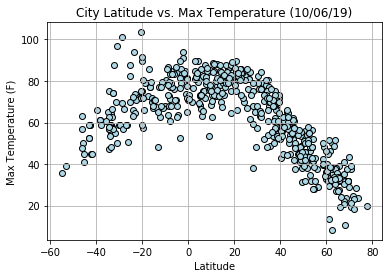

In [6]:
#using data frame columns to plot
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], facecolors="lightblue", edgecolors="black")

#formatting
plt.title('City Latitude vs. Max Temperature (10/06/19)')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/temp_vs_lat.png')
plt.show()

#### Latitude vs. Humidity Plot

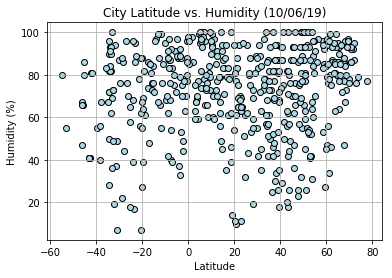

In [7]:
#using data frame columns to plot
plt.scatter(weather_df['Lat'], weather_df['Humidity'], facecolors="lightblue", edgecolors="black")

#formatting
plt.title('City Latitude vs. Humidity (10/06/19)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/humidity_vs_lat.png')
plt.show()

#### Latitude vs. Cloudiness Plot

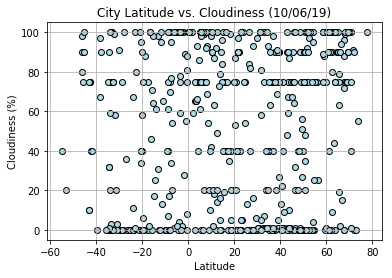

In [8]:
#using data frame columns to plot
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], facecolors="lightblue", edgecolors="black")

#formatting
plt.title('City Latitude vs. Cloudiness (10/06/19)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/cloudiness_vs_lat.png')
plt.show()

#### Latitude vs. Wind Speed Plot

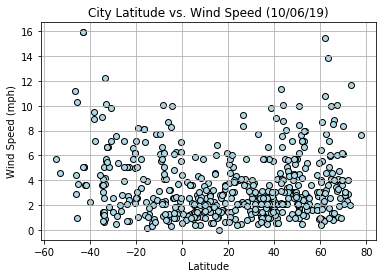

In [10]:
#using data frame columns to plot
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], facecolors="lightblue", edgecolors="black")

#formatting
plt.title('City Latitude vs. Wind Speed (10/06/19)')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig('../images/wind_speed_vs_lat.png')
plt.show()

## Observable Trends
* Despite the highest temperatures occuring between -40 and -20 degrees latitude, the distribution shows a central tendancy for the hottest cities to be at approximately 20 degrees latitude (i.e. not the equator) for this day, 10/06/19. 
* Wind speed appears to increase exponentially as the city nears closer to the south pole or the north pole. 
* From the lines of data points in the cloudiness plot, there is evidence to suggest that much of the data recorded was likely just a general estimation of the humidity (i.e. 0%, 20%, 40%, 75%, and 100%), while the rest of the data was recorded more precisely. 